In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

import data

In [3]:

# data_x1 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_1.csv")
# data_x2 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_2.csv")
# data_x3 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_3.csv")
# data_x4 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_4.csv")
# data_x5 = pd.read_csv("spectrum_x_method1/spectrum_doos_x_5.csv")
# data_source = pd.read_csv("calibration_and_background_method1/spectrum_source.csv")
# data_background = pd.read_csv("calibration_and_background_method1/spectrum_background.csv")

# data_y1 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_1.csv")
# data_y2 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_2.csv")
# data_y3 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_3.csv")
# data_y4 = pd.read_csv("spectrum_y_method1/spectrum_doos_y_4.csv")

data_x1 = pd.read_csv("spectrum_x_method2/spectrum_x1.csv")
data_x2 = pd.read_csv("spectrum_x_method2/spectrum_x2.csv")
data_x3 = pd.read_csv("spectrum_x_method2/spectrum_x3.csv")
data_x4 = pd.read_csv("spectrum_x_method2/spectrum_x4.csv")
data_x5 = pd.read_csv("spectrum_x_method2/spectrum_x5.csv")
data_source = pd.read_csv("calibration_and_background_method2/spectrum_scaling.csv")
data_background = pd.read_csv("calibration_and_background_method2/background_spectrum.csv")

data_y1 = pd.read_csv("spectrum_y_method2/spectrum_y1.csv")
data_y2 = pd.read_csv("spectrum_y_method2/spectrum_y2.csv")
data_y3 = pd.read_csv("spectrum_y_method2/spectrum_y3.csv")
data_y4 = pd.read_csv("spectrum_y_method2/spectrum_y4.csv")

define all functions for program

In [4]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 193.1787 and i < 203.5260662:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

def remove_background(dataset, dataset_2):
    data = []
    
    for i, j in zip(dataset, dataset_2):
        x = i - j
        data.append(x)
    
    return data

def add_counts(dataset_1, dataset_2):
    total_counts = []
    
    for i, j in zip(dataset_1, dataset_2):
        total_counts.append(i + j)
        
    return total_counts

def scaling(dataset, scaling_factor):
    data = []
    for i in dataset:
        data.append(i * scaling_factor)
    return data

def no_source(x, a, b):
    return a * x + b
    

remove background from all measured data

In [5]:
pulseheights_background = data_background["pulseheight"]
counts_background_A = data_background["counts_ch_A"]
counts_background_B = data_background["counts_ch_B"]
counts_tot_background = add_counts(counts_background_A, counts_background_B)

counts_A_x1 = remove_background(data_x1["counts_ch_A"], counts_background_A)
counts_B_x1 = remove_background(data_x1["counts_ch_B"], counts_background_B)
counts_total_x1 = add_counts(counts_A_x1, counts_B_x1)

counts_A_x2 = remove_background(data_x2["counts_ch_A"], counts_background_A)
counts_B_x2 = remove_background(data_x2["counts_ch_B"], counts_background_B)
counts_total_x2 = add_counts(counts_A_x2, counts_B_x2)

counts_A_x3 = remove_background(data_x3["counts_ch_A"], counts_background_A)
counts_B_x3 = remove_background(data_x3["counts_ch_B"], counts_background_B)
counts_total_x3 = add_counts(counts_A_x3, counts_B_x3)

counts_A_x4 = remove_background(data_x4["counts_ch_A"], counts_background_A)
counts_B_x4 = remove_background(data_x4["counts_ch_B"], counts_background_B)
counts_total_x4 = add_counts(counts_A_x4, counts_B_x4)

counts_A_x5 = remove_background(data_x5["counts_ch_A"], counts_background_A)
counts_B_x5 = remove_background(data_x5["counts_ch_B"], counts_background_B)
counts_total_x5 = add_counts(counts_A_x5, counts_B_x5)

pulseheights = data_source["pulseheight"]
counts_A_source = remove_background(data_source["counts_ch_A"], counts_background_A)
counts_B_source = remove_background(data_source["counts_ch_B"], counts_background_B)
counts_total_source = add_counts(counts_A_source, counts_B_source)


In [6]:

counts_A_y1 = remove_background(data_y1["counts_ch_A"], counts_background_A)
counts_B_y1 = remove_background(data_y1["counts_ch_B"], counts_background_B)
counts_total_y1 = add_counts(counts_A_y1, counts_B_y1)

counts_A_y2 = remove_background(data_y2["counts_ch_A"], counts_background_A)
counts_B_y2 = remove_background(data_y2["counts_ch_B"], counts_background_B)
counts_total_y2 = add_counts(counts_A_y2, counts_B_y2)

counts_A_y3 = remove_background(data_y3["counts_ch_A"], counts_background_A)
counts_B_y3 = remove_background(data_y3["counts_ch_B"], counts_background_B)
counts_total_y3 = add_counts(counts_A_y3, counts_B_y3)

counts_A_y4 = remove_background(data_y4["counts_ch_A"], counts_background_A)
counts_B_y4 = remove_background(data_y4["counts_ch_B"], counts_background_B)
counts_total_y4 = add_counts(counts_A_y4, counts_B_y4)

calculate scaling factor 

In [7]:
scaling_factor = max(counts_A_source) / max(counts_B_source)
print(scaling_factor)

2.0476190476190474


apply scaling factor to data

In [8]:
counts_B_x1 = scaling(counts_B_x1, scaling_factor)
counts_B_x2 = scaling(counts_B_x2, scaling_factor)
counts_B_x3 = scaling(counts_B_x3, scaling_factor)
counts_B_x4 = scaling(counts_B_x4, scaling_factor)
counts_B_x5 = scaling(counts_B_x5, scaling_factor)

counts_B_y1 = scaling(counts_B_y1, scaling_factor)
counts_B_y2 = scaling(counts_B_y2, scaling_factor)
counts_B_y3 = scaling(counts_B_y3, scaling_factor)
counts_B_y4 = scaling(counts_B_y4, scaling_factor)

counts_B_source = scaling(counts_B_source, scaling_factor)

In [9]:
# plt.plot(pulseheights_background, counts_background_A, color ='red', label = 'channel A')
# plt.plot(pulseheights_background, counts_background_B, color = 'blue', label = 'channel B')
# plt.gca().set_facecolor('lightgrey')
# plt.title("Background radiation")
# plt.legend(loc = 'upper right')
# plt.ylabel("counts")
# plt.xlabel("pulseheights (mV)")
# plt.show()

plot graphs for all the measured data (all x and y locations)

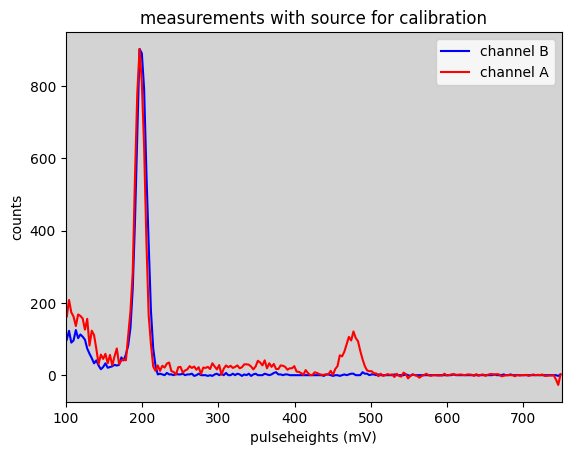

902.9999999999999


In [10]:
plt.plot(pulseheights, counts_B_source, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_source, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("measurements with source for calibration")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()
print(max(counts_B_source))

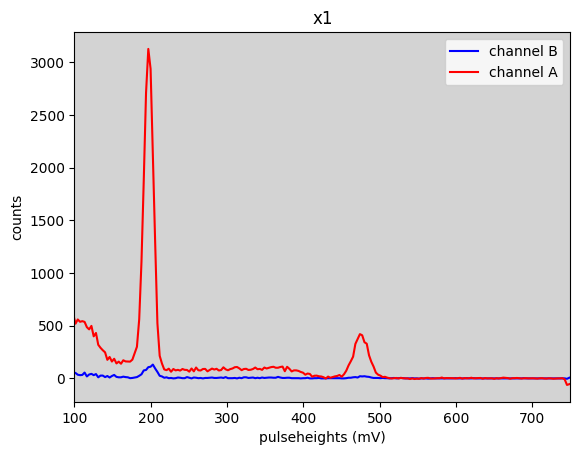

In [11]:
plt.plot(pulseheights, counts_B_x1, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x1")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

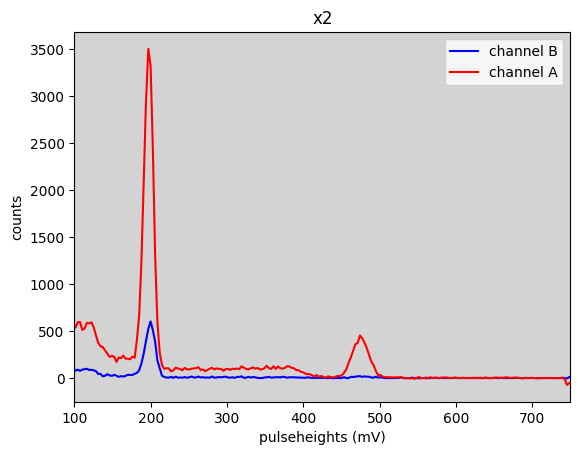

In [12]:
plt.plot(pulseheights, counts_B_x2, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x2")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

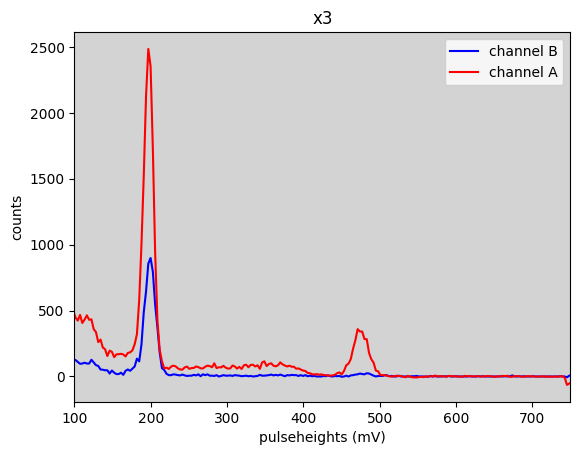

In [13]:
plt.plot(pulseheights, counts_B_x3, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x3")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

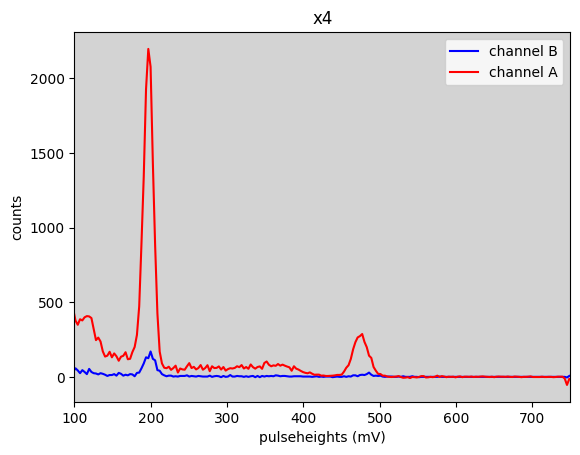

In [14]:
plt.plot(pulseheights, counts_B_x4, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x4")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

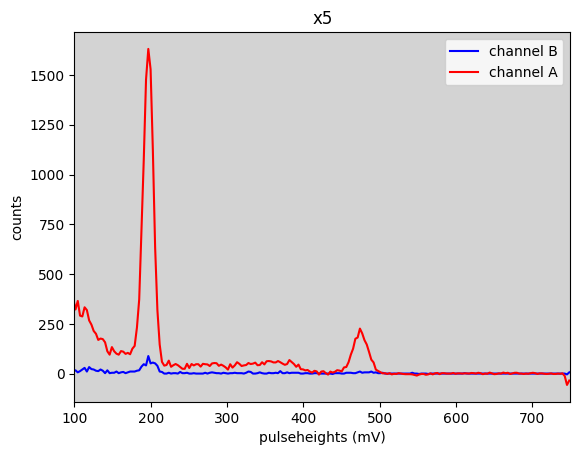

In [15]:
plt.plot(pulseheights, counts_B_x5, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_x5, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("x5")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

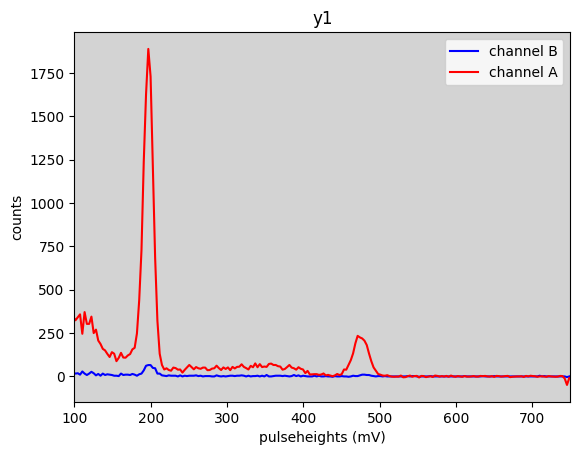

In [16]:
plt.plot(pulseheights, counts_B_y1, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y1, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y1")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

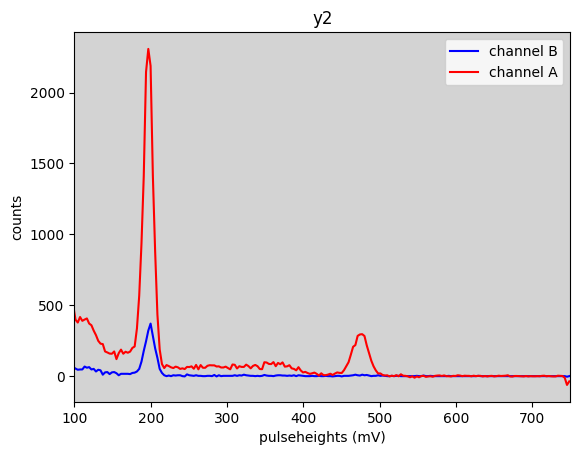

In [17]:
plt.plot(pulseheights, counts_B_y2, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y2, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y2")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

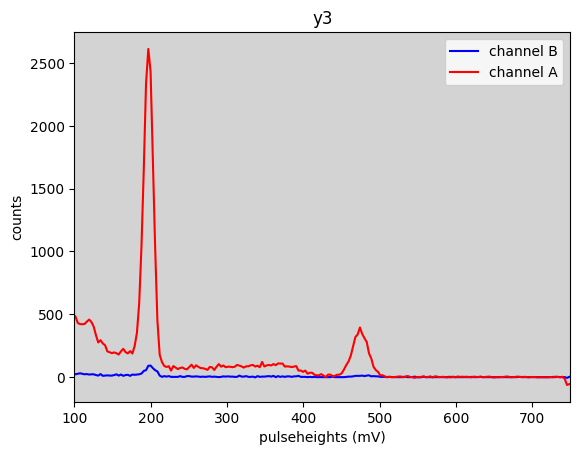

In [18]:
plt.plot(pulseheights, counts_B_y3, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y3, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y3")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

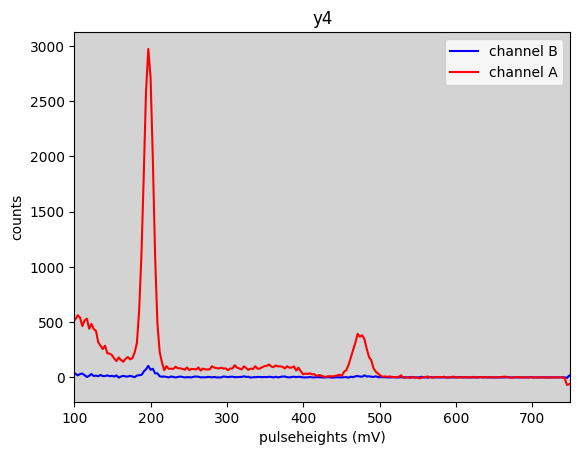

In [19]:
plt.plot(pulseheights, counts_B_y4, color = 'blue', label = "channel B")
plt.plot(pulseheights, counts_A_y4, color = 'red', label = 'channel A')
plt.gca().set_facecolor('lightgrey')
plt.title("y4")
plt.legend(loc = 'upper right')
plt.xlim(100, 750)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

In [20]:
border_x = [0, 30]
border_y = [max(counts_B_source) / 2, max(counts_B_source) / 2]

C:\Users\jorge\AppData\Local\Temp\ipykernel_18296\2973238411.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  model = curve_fit(no_source, x_counts_fit, y_counts_fit, p0 = [-4.6, 480])


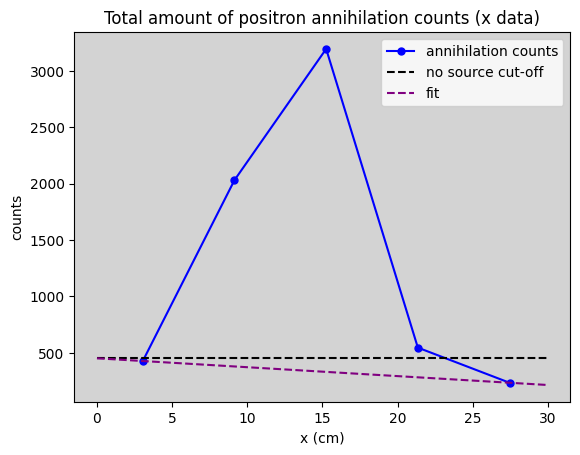

In [21]:
x_loc = [3.05, 9.15, 15.25, 21.35, 27.45]

x_fit = []
y_fit = []

_, counts_A_x1 = adjust(pulseheights, counts_A_x1)
_, counts_B_x1 = adjust(pulseheights, counts_B_x1)
_, counts_A_x2 = adjust(pulseheights, counts_A_x2)
_, counts_B_x2 = adjust(pulseheights, counts_B_x2)
_, counts_A_x3 = adjust(pulseheights, counts_A_x3)
_, counts_B_x3 = adjust(pulseheights, counts_B_x3)
_, counts_A_x4 = adjust(pulseheights, counts_A_x4)
_, counts_B_x4 = adjust(pulseheights, counts_B_x4)
_, counts_A_x5 = adjust(pulseheights, counts_A_x5)
_, counts_B_x5 = adjust(pulseheights, counts_B_x5)

x1_counts = [sum(counts_B_x1)]
x2_counts = [sum(counts_B_x2)]
x3_counts = [sum(counts_B_x3)]
x4_counts = [sum(counts_B_x4)]
x5_counts = [sum(counts_B_x5)]
x_counts = [x1_counts, x2_counts, x3_counts, x4_counts, x5_counts]
y_counts_fit = np.array([sum(counts_B_x1), sum(counts_B_x5)])
x_counts_fit = np.array([3.05, 27.45])

model = curve_fit(no_source, x_counts_fit, y_counts_fit, p0 = [-4.6, 480])
a, b = model[0]

for x in np.arange(0, 30, 0.1):
    y_fit.append(a * x + b)
    x_fit.append(x)

plt.plot(x_loc, x_counts, 'o-', markersize = 5, color = 'blue', label = 'annihilation counts')
plt.plot(border_x, border_y, '--', color = 'black', label = 'no source cut-off')
plt.plot(x_fit, y_fit, '--', color = 'purple', label = 'fit')
plt.gca().set_facecolor('lightgrey')
plt.legend(loc = 'upper right')
plt.title("Total amount of positron annihilation counts (x data)")
plt.ylabel("counts")
plt.xlabel("x (cm)")
plt.show()

3.498768985794776 231.65659348898905


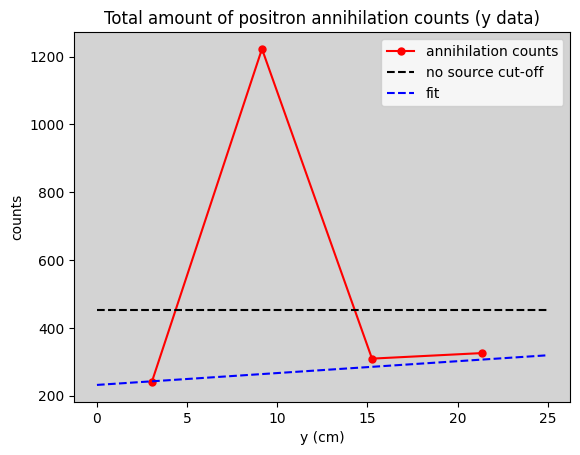

In [22]:
y_loc = [3.05, 9.15, 15.25, 21.35]
border_x = [0, 25]
border_y = [max(counts_B_source) / 2, max(counts_B_source) / 2]
x_fit = []
y_fit = []

_, counts_A_y1 = adjust(pulseheights, counts_A_y1)
_, counts_B_y1 = adjust(pulseheights, counts_B_y1)
_, counts_A_y2 = adjust(pulseheights, counts_A_y2)
_, counts_B_y2 = adjust(pulseheights, counts_B_y2)
_, counts_A_y3 = adjust(pulseheights, counts_A_y3)
_, counts_B_y3 = adjust(pulseheights, counts_B_y3)
_, counts_A_y4 = adjust(pulseheights, counts_A_y4)
_, counts_B_y4 = adjust(pulseheights, counts_B_y4)

y1_counts = [sum(counts_B_y1)]
y2_counts = [sum(counts_B_y2)]
y3_counts = [sum(counts_B_y3)]
y4_counts = [sum(counts_B_y4)]

y_counts = [y1_counts, y2_counts, y3_counts, y4_counts]

y_counts_fit = np.array([sum(counts_B_y1), sum(counts_B_y3), sum(counts_B_y4)])
x_counts_fit = np.array([3.05, 21.35, 27.45])

model = curve_fit(no_source, x_counts_fit, y_counts_fit, p0 = [3.5, 230])
a, b = model[0]
print(a, b)

for x in np.arange(0, 25, 0.1):
    y_fit.append(a * x + b)
    x_fit.append(x)

plt.plot(y_loc, y_counts, 'o-', markersize = 5, color = 'red', label = 'annihilation counts')
plt.plot(border_x, border_y, '--', color = 'black', label = 'no source cut-off')
plt.plot(x_fit, y_fit, '--', color = 'blue', label = 'fit')
plt.gca().set_facecolor('lightgrey')
plt.legend(loc = 'upper right')
plt.title("Total amount of positron annihilation counts (y data)")
plt.ylabel("counts")
plt.xlabel("y (cm)")
plt.show()